<a href="https://colab.research.google.com/github/sreelekaa/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from google.colab import files
uploaded = files.upload()  # Upload the CSV file

# Use the openpyxl engine to read the Excel file
data = pd.read_excel('Credit Card Defaulter Prediction.xlsx', engine='openpyxl')
# Inspect the first few rows of the DataFrame to identify potential issues
print(data.head())

Saving Credit Card Defaulter Prediction.xlsx to Credit Card Defaulter Prediction (5).xlsx
   ID  LIMIT_BAL SEX   EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000   F  University  Married   24      2      2     -1     -1   
1   2     120000   F  University   Single   26     -1      2      0      0   
2   3      90000   F  University   Single   34      0      0      0      0   
3   4      50000   F  University  Married   37      0      0      0      0   
4   5      50000   M  University  Married   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

  

In [8]:
# Convert non-numeric columns to numeric if they represent categorical data
for col in data.columns:
    if data[col].dtype == 'object':
        try:
            # Attempt to convert the column to numeric (e.g., using one-hot encoding or label encoding)
            data[col] = pd.to_numeric(data[col])
        except ValueError:
            # If conversion fails, it likely means the column is categorical
            data = pd.get_dummies(data, columns=[col])


In [9]:
print(data.isnull().sum())


ID                           0
LIMIT_BAL                    0
AGE                          0
PAY_0                        0
PAY_2                        0
PAY_3                        0
PAY_4                        0
PAY_5                        0
PAY_6                        0
BILL_AMT1                    0
BILL_AMT2                    0
BILL_AMT3                    0
BILL_AMT4                    0
BILL_AMT5                    0
BILL_AMT6                    0
PAY_AMT1                     0
PAY_AMT2                     0
PAY_AMT3                     0
PAY_AMT4                     0
PAY_AMT5                     0
PAY_AMT6                     0
SEX_F                        0
SEX_M                        0
EDUCATION_0                  0
EDUCATION_Graduate school    0
EDUCATION_High School        0
EDUCATION_Others             0
EDUCATION_University         0
EDUCATION_Unknown            0
MARRIAGE_0                   0
MARRIAGE_Married             0
MARRIAGE_Other               0
MARRIAGE

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   ID                         30000 non-null  int64
 1   LIMIT_BAL                  30000 non-null  int64
 2   AGE                        30000 non-null  int64
 3   PAY_0                      30000 non-null  int64
 4   PAY_2                      30000 non-null  int64
 5   PAY_3                      30000 non-null  int64
 6   PAY_4                      30000 non-null  int64
 7   PAY_5                      30000 non-null  int64
 8   PAY_6                      30000 non-null  int64
 9   BILL_AMT1                  30000 non-null  int64
 10  BILL_AMT2                  30000 non-null  int64
 11  BILL_AMT3                  30000 non-null  int64
 12  BILL_AMT4                  30000 non-null  int64
 13  BILL_AMT5                  30000 non-null  int64
 14  BILL_AMT6             

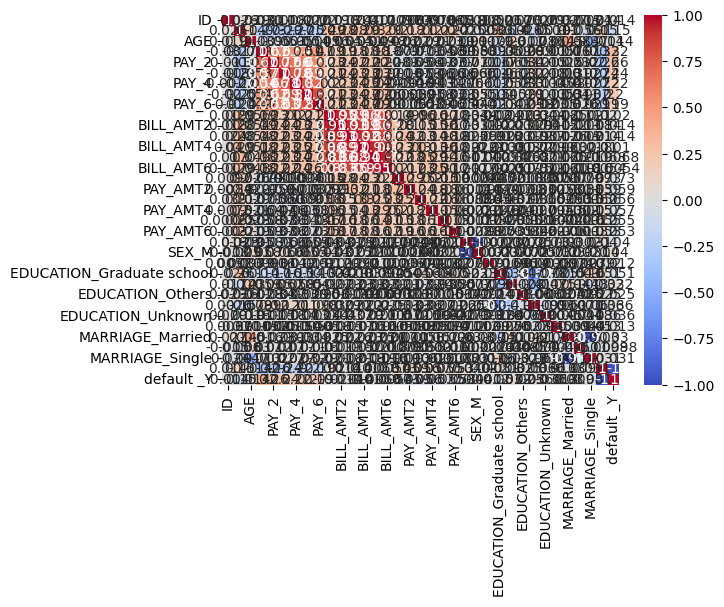

In [11]:
data.info()
data.describe()
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [12]:
data.fillna(data.mean(), inplace=True)
data = pd.get_dummies(data, drop_first=True)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [14]:
print(data.columns)



Index(['ID', 'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_F', 'SEX_M', 'EDUCATION_0',
       'EDUCATION_Graduate school', 'EDUCATION_High School',
       'EDUCATION_Others', 'EDUCATION_University', 'EDUCATION_Unknown',
       'MARRIAGE_0', 'MARRIAGE_Married', 'MARRIAGE_Other', 'MARRIAGE_Single',
       'default _N', 'default _Y'],
      dtype='object')


In [17]:
# Set the target column
target_column = 'default _Y'

# Define features (X) and target (y)
X = data.drop(['default _N', 'default _Y'], axis=1)
y = data[target_column]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.84      0.95      0.89      4687
        True       0.67      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



K-S Statistic: 0.4003190754157722


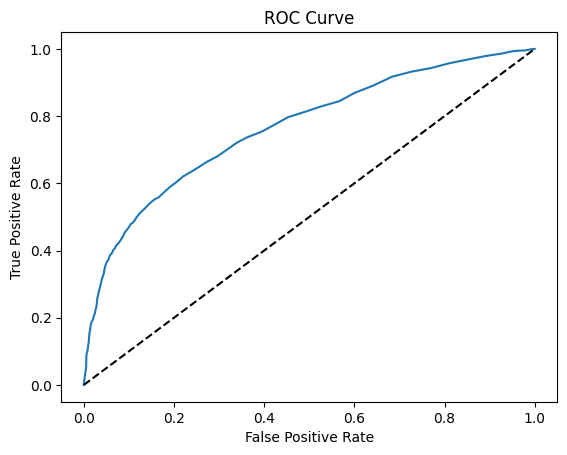

In [19]:
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
ks_statistic = max(tpr - fpr)
print(f"K-S Statistic: {ks_statistic}")

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
